In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

import sys
import os

dir_current = globals()['_dh'][0]
dir_TNGcube = dir_current+'/../'

sys.path.append(dir_TNGcube)

from queryTNG import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
baseURL

'http://www.tng-project.org/api/'

## Find snapNum given redshift

In [3]:
snapNum = get_snapNum(redshift=0.35, simName='TNG50-1', baseURL=baseURL)
snapNum

75

## QueryTNG

In [4]:
QTNG = QueryTNG(simName='TNG50-1', snapNum=75)

In [5]:
QTNG.simInfo

{'name': 'TNG50-1',
 'description': 'Main high-resolution IllustrisTNG50 run including the full TNG physics model.',
 'name_alt': 'L35n2160TNG',
 'boxsize': 35000.0,
 'z_start': 127.0,
 'z_final': 0.0,
 'cosmology': 'Planck2015',
 'omega_0': 0.3089,
 'omega_L': 0.6911,
 'omega_B': 0.0486,
 'hubble': 0.6774,
 'physics_model': 'Fiducial TNG Model',
 'has_cooling': True,
 'has_starformation': True,
 'has_winds': True,
 'has_blackholes': True,
 'mass_gas': 5.73879e-06,
 'mass_dm': 3.07367708626464e-05,
 'softening_dm_comoving': 0.39,
 'softening_stars_comoving': 0.39,
 'softening_blackholes_comoving': 0.39,
 'softening_gas_comoving': 0.39,
 'softening_dm_max_phys': 0.195,
 'softening_stars_max_phys': 0.195,
 'softening_blackholes_max_phys': 0.39,
 'softening_gas_max_phys': 0.195,
 'softening_gas_factor': 2.5,
 'softening_gas_comoving_min': 0.05,
 'num_dm': 10077696000,
 'num_tr_mc': 10077696000,
 'num_tr_vel': 0,
 'longids': True,
 'is_uniform': True,
 'is_zoom': False,
 'is_subbox': False

In [6]:
QTNG.snapInfo

{'simulation': 'http://www.tng-project.org/api/TNG50-1/',
 'number': 75,
 'redshift': 0.347853841858178,
 'num_gas': 8862163389,
 'num_dm': 10077696000,
 'num_trmc': 10077696000,
 'num_stars': 1102338034,
 'num_bhs': 4056,
 'num_groups_fof': 10537931,
 'num_groups_subfind': 6077258,
 'num_groups_rockstar': 0,
 'filesize_snapshot': 1077235079036.0,
 'filesize_groupcat': 6646750894.0,
 'filesize_rockstar': 0.0,
 'url': 'http://www.tng-project.org/api/TNG50-1/snapshots/75/',
 'subhalos': 'http://www.tng-project.org/api/TNG50-1/snapshots/75/subhalos/',
 'vis': {'groupcat_sfms': 'http://www.tng-project.org/api/TNG50-1/snapshots/75/subhalos/plot.png?xQuant=mstar2_log&yQuant=ssfr&xlim=9.0%2C11.0',
  'groupcat_sizemass': 'http://www.tng-project.org/api/TNG50-1/snapshots/75/subhalos/plot.png?xQuant=mstar2_log&yQuant=size_stars',
  'groupcat_mz_gas': 'http://www.tng-project.org/api/TNG50-1/snapshots/75/subhalos/plot.png?xQuant=mstar2_log&yQuant=Z_gas',
  'groupcat_mz_stars': 'http://www.tng-proj

## Query subhalo IDs given certain condiction

In [7]:
# try different pageID to show subhalos with larger IDs
subhaloIDs = QTNG.query_subhaloCat(mass_range=[1e10, 1e15], vmax_range=[50., 1050.], limit=10, pageID=1)
subhaloIDs

search url: http://www.tng-project.org/api/TNG50-1/snapshots/75/subhalos/?limit=10&offset=10&mass__gt=0.6774&mass__lt=67740.0&vmax__gt=50.0&vmax__lt=1050.0


[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

### - use .subhaloCat to quickly view some properties subjected to subhaloIDs

In [8]:
QTNG.subhaloCat['results']

[{'id': 10,
  'sfr': 0.0104922,
  'mass_log_msun': 11.611495015673922,
  'url': 'http://www.tng-project.org/api/TNG50-1/snapshots/75/subhalos/10/'},
 {'id': 11,
  'sfr': 9.23384,
  'mass_log_msun': 11.53474760963499,
  'url': 'http://www.tng-project.org/api/TNG50-1/snapshots/75/subhalos/11/'},
 {'id': 12,
  'sfr': 0.00174182,
  'mass_log_msun': 11.60288144996208,
  'url': 'http://www.tng-project.org/api/TNG50-1/snapshots/75/subhalos/12/'},
 {'id': 13,
  'sfr': 0.0,
  'mass_log_msun': 11.593184980774321,
  'url': 'http://www.tng-project.org/api/TNG50-1/snapshots/75/subhalos/13/'},
 {'id': 14,
  'sfr': 1.87598,
  'mass_log_msun': 11.402084879983855,
  'url': 'http://www.tng-project.org/api/TNG50-1/snapshots/75/subhalos/14/'},
 {'id': 15,
  'sfr': 0.0,
  'mass_log_msun': 11.256343278598884,
  'url': 'http://www.tng-project.org/api/TNG50-1/snapshots/75/subhalos/15/'},
 {'id': 16,
  'sfr': 1.87815,
  'mass_log_msun': 11.348485374035246,
  'url': 'http://www.tng-project.org/api/TNG50-1/snaps

### - use .query_subhaloInfo to check detail properties subjected to the input subhaloID

In [9]:
subhaloInfo = QTNG.query_subhaloInfo(46)
subhaloInfo

{'snap': 75,
 'id': 46,
 'mass': 5.62947,
 'stellarphotometrics_r': -19.0875,
 'vmax': 94.5006,
 'vmaxrad': 9.9715,
 'mass_log_msun': 10.919622316768256,
 'cm': array([ 8364.92, 24582.  , 21766.5 ]),
 'pos': array([ 8364.78, 24583.6 , 21768.1 ]),
 'spin': array([ -96.1246,  -11.3787, -158.723 ]),
 'vel': array([-865.215 ,   17.2853, -195.896 ])}

## Download subhalo info and its associated snapshot partical information

In [10]:
catalog = QTNG.download_subhalos(subhaloIDs=[5, 46])

http://www.tng-project.org/api/TNG50-1/snapshots/75/subhalos/5/cutout.hdf5
http://www.tng-project.org/api/TNG50-1/snapshots/75/subhalos/46/cutout.hdf5


In [11]:
catalog[46].info

{'snap': 75,
 'id': 46,
 'mass': 5.62947,
 'stellarphotometrics_r': -19.0875,
 'vmax': 94.5006,
 'vmaxrad': 9.9715,
 'mass_log_msun': 10.919622316768256,
 'cm': array([ 8364.92, 24582.  , 21766.5 ]),
 'pos': array([ 8364.78, 24583.6 , 21768.1 ]),
 'spin': array([ -96.1246,  -11.3787, -158.723 ]),
 'vel': array([-865.215 ,   17.2853, -195.896 ])}

# Plots

In [12]:
subhalo = pickle.load(open('subhalo_46.pkl', 'rb'))

print('stellarphotometrics_r:', subhalo.info['stellarphotometrics_r'])
print('vmax:', subhalo.info['vmax'])
print('vmaxrad:', subhalo.info['vmaxrad'])

print('spin:', subhalo.info['spin'])
print('tot. spin mag.:', np.linalg.norm(np.array(subhalo.info['spin'])))

stellarphotometrics_r: -19.0875
vmax: 94.5006
vmaxrad: 9.9715
spin: [ -96.1246  -11.3787 -158.723 ]
tot. spin mag.: 185.90966695642808


In [5]:
def plotImg_subhalo(subhalo, idx=0, idy=1, ptlType='gas'):
    image_npix = 91
    D_x = 15.
    
    bins_pos = np.linspace(-D_x, D_x, image_npix)
    
    pos = subhalo.snap[ptlType]['pos']
    mass = subhalo.snap[ptlType]['mass']

    pos_label = {0:'$\Delta x$ [ckpc/h]', 1: '$\Delta y$ [ckpc/h]', 2:'$\Delta z$ [ckpc/h]'}
    
    fig, ax = plt.subplots(1, 1, figsize=(4.3, 4))
    plt.rc('font', size=14)
    
    ax.hist2d(pos[:,idx], pos[:,idy], weights=mass, bins=bins_pos)
    
    ax.set_xlabel(pos_label[idx])
    ax.set_ylabel(pos_label[idy])
    
    ax.set_aspect('equal')
    
    ax.axhline(y=0, color='lightgray', ls=':')
    ax.axvline(x=0, color='lightgray', ls=':')
    
    return ax

def plotXV_subhalo(subhalo, id_pos = 1, id_vel = 0, ptlType='stars'):
    D_x = 15.
    D_v = 130.
    bins_pos = np.linspace(-D_x, D_x, 41)
    bins_vel = np.linspace(-D_v, D_v, 41)
    
    vel_label = {0:'$v_x$ [km/s]', 1: '$v_y$ [km/s]', 2:'$v_z$ [km/s]'}
    pos_label = {0:'$\Delta x$ [ckpc/h]', 1: '$\Delta y$ [ckpc/h]', 2:'$\Delta z$ [ckpc/h]'}
    
    pos = subhalo.snap[ptlType]['pos']
    mass = subhalo.snap[ptlType]['mass']
    vel = subhalo.snap[ptlType]['vel']

    fig, ax = plt.subplots(1, 1, figsize=(6., 4))
    plt.rc('font', size=14)
    
    ax.hist2d(pos[:,id_pos], vel[:,id_vel], weights=mass, bins=(bins_pos, bins_vel))
    
    ax.set_xlabel(pos_label[id_pos])
    ax.set_ylabel(vel_label[id_vel])
    
    ax.axhline(y=0, color='lightgray', ls=':')
    ax.axvline(x=0, color='lightgray', ls=':')
    
    #plt.title(ptlType)
    #plt.savefig('spec.pdf',bbox_inches='tight')
    
    return ax

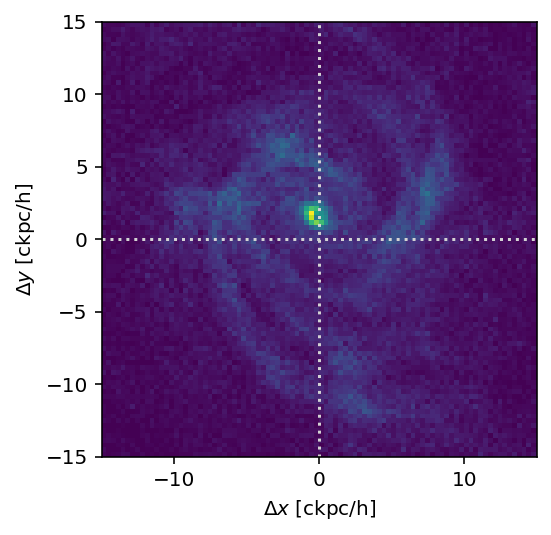

In [14]:
ax = plotImg_subhalo(subhalo, idx=0, idy=1, ptlType='gas')

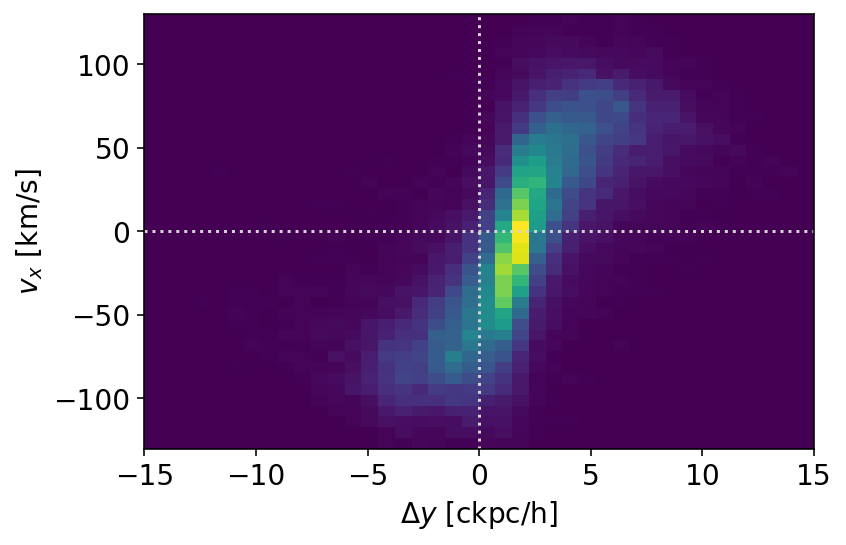

In [15]:
ax2 = plotXV_subhalo(subhalo, id_pos = 1, id_vel = 0, ptlType='stars')

# coordinate (minor) adjustment on subhalo

In [3]:
from utils import *

subhalo = pickle.load(open('subhalo_46.pkl', 'rb'))
R_spin = spin_rotation(spin0=subhalo.info['spin'], spinR=[0, 0, -1])
R_sini = sini_rotation(sini=1.0) # edge on on x-y plane
R_pa = PA_rotation(theta=0.)

Rtot = R_pa@R_sini@R_spin

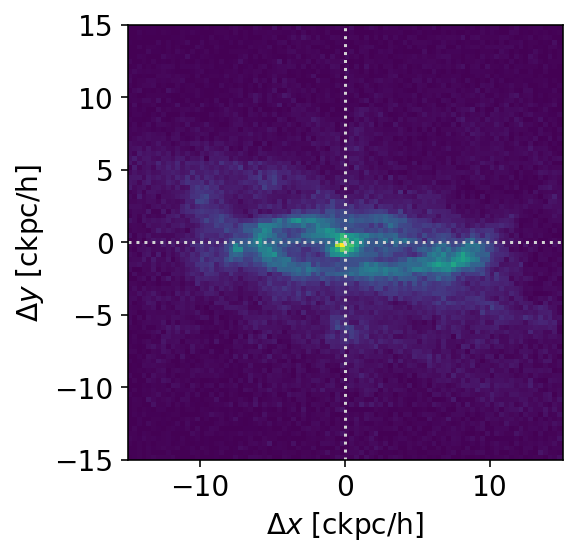

In [12]:
theta = 9. *np.pi/180.
dx = [0.9,1.3,0]
dv = [0.,0.,4.5]
#theta = 0. *np.pi/180.
#dx = [0.,0.,0]

subhalo = pickle.load(open('subhalo_46.pkl', 'rb'))
subhalo.rotation(Rtot)

Rth = PA_rotation(theta=theta)
subhalo.rotation(Rth)

subhalo.recenter_pos(dx=dx)
subhalo.recenter_vel(dv=dv)

ax = plotImg_subhalo(subhalo, idx=0, idy=1, ptlType='gas')

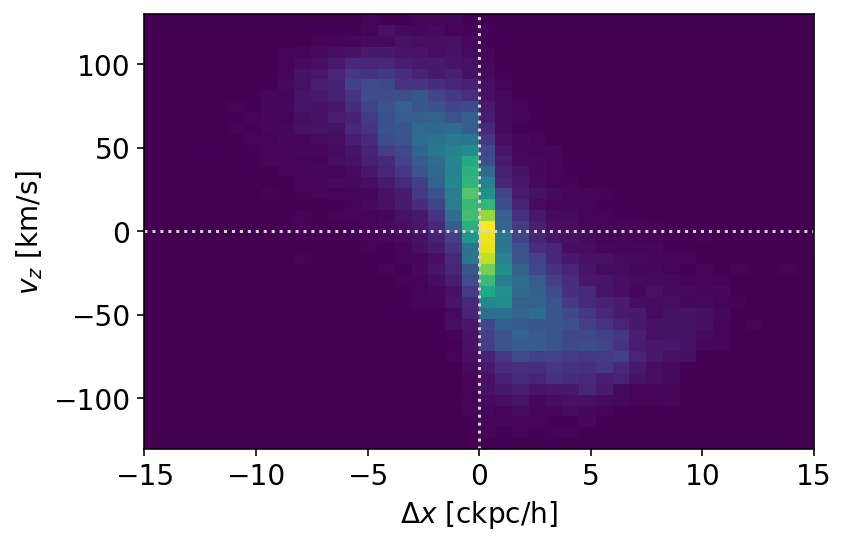

In [13]:
ax2 = plotXV_subhalo(subhalo, id_pos = 0, id_vel = 2, ptlType='stars')